In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2022-12-14 10:31:40--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  13.7MB/s    in 0.4s    

2022-12-14 10:31:40 (13.7 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [30]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("bbc_text_cls.csv")

In [4]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
df["targets"] = df["labels"].astype("category").cat.codes

In [6]:
K = df["targets"].max() + 1
K

5

In [7]:
df_train, df_test = train_test_split(df, test_size=0.33)

In [8]:
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train["text"])
sequences_train = tokenizer.texts_to_sequences(df_train["text"])
sequences_test = tokenizer.texts_to_sequences(df_test["text"]) 

In [9]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"Found {V} unique tokens.")

Found 27238 unique tokens.


In [11]:
data_train = pad_sequences(sequences_train)
print(f"Shape of the data train tensor: {data_train.shape}")

Shape of the data train tensor: (1490, 3472)


In [12]:
T = data_train.shape[1]
data_test = pad_sequences(sequences_test, maxlen=T)
print(f"Shape of the data test tensor: {data_test.shape}")

Shape of the data test tensor: (735, 3472)


In [13]:
D = 50

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3472)]            0         
                                                                 
 embedding (Embedding)       (None, 3472, 50)          1361950   
                                                                 
 lstm (LSTM)                 (None, 3472, 32)          10624     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 1,372,739
Trainable params: 1,372,739
Non-trainable params: 0
___________________________________________________

In [ ]:
# i = Input(shape=(T,))
# x = Embedding(V + 1, D)(i)
# x = GRU(32, return_sequences=True)(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(K)(x)

# model = Model(i, x)

In [15]:
# i = Input(shape=(T,))
# x = Embedding(V + 1, D)(i)
# x = SimpleRNN(32, return_sequences=True)(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(K)(x)

# model = Model(i, x)

In [ ]:
# i = Input(shape=(T,))
# x = Embedding(V + 1, D)(i)
# x = LSTM(32)(x)
# x = Dense(K)(x)

# model = Model(i, x)

In [ ]:
# i = Input(shape=(T,))
# x = Embedding(V + 1, D)(i)
# x = GRU(32)(x)
# x = Dense(K)(x)

# model = Model(i, x)

In [ ]:
# i = Input(shape=(T,))
# x = Embedding(V + 1, D)(i)
# x = SimpleRNN(32)(x)
# x = Dense(K)(x)

# model = Model(i, x)

In [17]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"]
)

ft = model.fit(
    data_train,
    df_train["targets"],
    epochs=50,
    validation_data=(data_test, df_test["targets"])
)

Epoch 1/50
47/47 [==============================] - 108s 2s/step - loss: 1.5290 - accuracy: 0.4208 - val_loss: 1.4071 - val_accuracy: 0.4136
Epoch 2/50
47/47 [==============================] - 104s 2s/step - loss: 1.5251 - accuracy: 0.3752 - val_loss: 1.2969 - val_accuracy: 0.7129
Epoch 3/50
47/47 [==============================] - 103s 2s/step - loss: 1.0931 - accuracy: 0.7745 - val_loss: 0.9807 - val_accuracy: 0.8408
Epoch 4/50
47/47 [==============================] - 104s 2s/step - loss: 0.7682 - accuracy: 0.8805 - val_loss: 0.6473 - val_accuracy: 0.8762
Epoch 5/50
47/47 [==============================] - 104s 2s/step - loss: 0.5023 - accuracy: 0.9295 - val_loss: 0.4889 - val_accuracy: 0.8993
Epoch 6/50
47/47 [==============================] - 103s 2s/step - loss: 0.3847 - accuracy: 0.9141 - val_loss: 0.3795 - val_accuracy: 0.9252
Epoch 7/50
47/47 [==============================] - 106s 2s/step - loss: 0.2710 - accuracy: 0.9490 - val_loss: 0.3682 - val_accuracy: 0.8803
Epoch 8/50
47

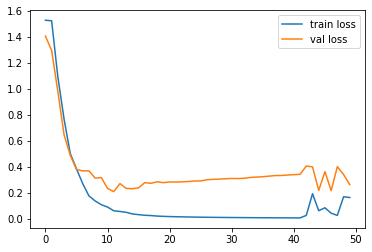

In [18]:
plt.plot(ft.history["loss"], label="train loss")
plt.plot(ft.history["val_loss"], label="val loss")
plt.legend();

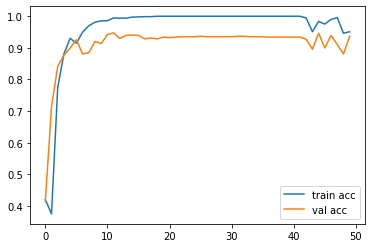

In [19]:
plt.plot(ft.history["accuracy"], label="train acc")
plt.plot(ft.history["val_accuracy"], label="val acc")
plt.legend();

In [25]:
Ptrain = np.argmax(model.predict(data_train), axis=1)
Ptest = np.argmax(model.predict(data_test), axis=1)

23/23 [==============================] - 7s 293ms/step


In [35]:
cm = confusion_matrix(df_train["targets"], Ptrain)
cm

array([[340,   0,   5,   0,   7],
       [  0, 258,   0,   0,   0],
       [  0,   0, 274,   0,   2],
       [  0,   1,   1, 343,   1],
       [  0,   0,   0,   0, 258]])

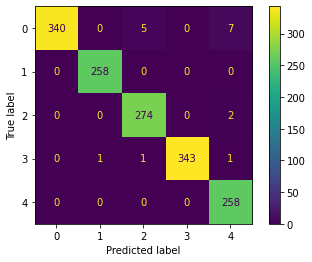

In [36]:
ConfusionMatrixDisplay.from_predictions(df_train["targets"], Ptrain);

In [37]:
cm_test = confusion_matrix(df_test["targets"], Ptest)
cm_test

array([[142,   1,   5,   0,  10],
       [  4, 116,   2,   2,   4],
       [  2,   2, 136,   1,   0],
       [  0,   6,   0, 158,   1],
       [  3,   2,   0,   2, 136]])

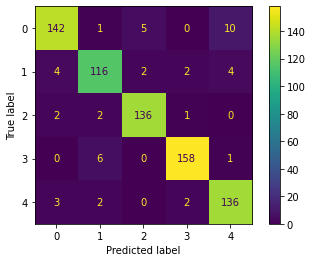

In [38]:
ConfusionMatrixDisplay.from_predictions(df_test["targets"], Ptest);